## Regresion lineal

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [30]:
!pip install scikit-learn

In [32]:
### cargar datos
file_name='datosML/linear.data'
data=np.loadtxt(file_name,delimiter=',') 
X=data[:,0]
Y=data[:,1]

In [33]:
data

array([[ 5.     , 18.28972],
       [ 5.07538, 14.5965 ],
       [ 5.15075, 14.45794],
       [ 5.22613, 12.69562],
       [ 5.30151, 17.89665],
       [ 5.37688, 18.54424],
       [ 5.45226, 13.26409],
       [ 5.52764, 10.97219],
       [ 5.60302, 17.80032],
       [ 5.67839, 15.41688],
       [ 5.75377, 15.65412],
       [ 5.82915, 12.86988],
       [ 5.90452, 16.64612],
       [ 5.9799 , 13.41926],
       [ 6.05528, 15.67941],
       [ 6.13065, 20.1247 ],
       [ 6.20603, 16.98202],
       [ 6.28141, 19.53321],
       [ 6.35678, 16.52009],
       [ 6.43216, 17.87633],
       [ 6.50754, 14.01981],
       [ 6.58291, 17.44618],
       [ 6.65829, 18.07654],
       [ 6.73367, 18.3747 ],
       [ 6.80905, 18.39733],
       [ 6.88442, 18.91512],
       [ 6.9598 , 17.93191],
       [ 7.03518, 15.00155],
       [ 7.11055, 17.14027],
       [ 7.18593, 19.99612],
       [ 7.26131, 18.71122],
       [ 7.33668, 20.545  ],
       [ 7.41206, 17.52333],
       [ 7.48744, 20.79583],
       [ 7.562

[2.20521858]
3.0838057356144617


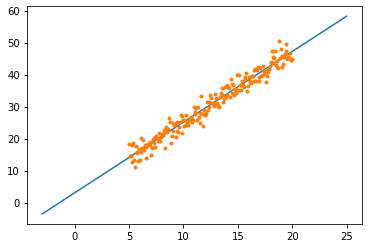

In [34]:
reg = LinearRegression()
#notar que X.reshape(-1,1) es necesario porque x contiene una sola variable
#si X contiene mas variables, solo se debe garantizar que cada col. es una var.
reg.fit(X.reshape(-1, 1), Y)
#observar los coeficientes
print(reg.coef_)
#observar el intercepto
print(reg.intercept_)


#graficar, primero trazar una recta usando el modelo estimado, luego graficar los datos reales
xx=np.linspace(-3,25,100)
yy=reg.predict(xx.reshape(-1, 1))

##
plt.plot(xx,yy)
plt.plot(X,Y,'.')

In [38]:
#predecir valores
y_pred=reg.predict(X.reshape(-1, 1))
print(y_pred[0],Y[0],y_pred[0]-Y[0])

14.109898621368677 18.28972 -4.179821378631322


In [6]:
rmse = np.sqrt( ((Y -y_pred)**2).mean()); 
rmse

1.946475091043227

In [89]:
### cargar datos
file_name='datosML/housing2.data'
data=np.loadtxt(file_name,delimiter=',') 
#guardar en X las primeras 13 variables
#guardar en Y la ultima col. es decir en data la col 13
X=data[:,:13]
Y=data[:,13]
print('X shape: ',X.shape)
print('Y shape', Y.shape)

X shape:  (506, 13)
Y shape (506,)


In [49]:
reg = LinearRegression()
reg.fit(X, Y)
#observar los coeficientes
print(reg.coef_)
#observar el intercepto
print(reg.intercept_)
y_pred=reg.predict(X)
print(y_pred[0],Y[0],y_pred[0]-Y[0])
rmse = np.sqrt( ((Y -y_pred)**2).mean()); 
print(rmse)

[-1.59939124e-01  3.88736529e-02 -2.79218568e-02  3.21656919e+00
 -2.04845602e+01  6.12307209e+00 -4.59320518e-02 -1.55491228e+00
  2.81575033e-01 -1.17383824e-02 -1.01422283e+00  1.36208333e-02]
20.65262802491497
27.866501450412326 24.0 3.8665014504123256
5.16326781411981


In [51]:
### cargar datos
file_name='datosML/housing2.data'
data=np.loadtxt(file_name,delimiter=',') 
print(data.shape)
X=data[:,:2]
Y=data[:,13]
reg = LinearRegression()
reg.fit(X, Y)
#observar los coeficientes
print(reg.coef_)
#observar el intercepto
print(reg.intercept_)
y_pred=reg.predict(X)
print(y_pred[0],Y[0],y_pred[0]-Y[0])
rmse = np.sqrt( ((Y -y_pred)**2).mean()); 
print(rmse)

(506, 14)
[-0.35207832  0.11610909]
22.485628113468223
24.573366631705547 24.0 0.5733666317055466
8.041539407706544


## Regresion Logistica

In [7]:
from sklearn.linear_model import LogisticRegression

In [52]:
### esta funcion crea datos de forma artificial 
# en total 2 clases, cada clase de 500 puntos 
#cada clase tiene centro diferente
#clase 1 tiene centro en (0.7, 3)   esta se maneja con etiqueta 0
#clase 2                  (3, 0.3)  esta se maneja con etiqueta 1
def createData(N=[500,500]):
    #generar puntos de forma artificial 
    #definir valor medio y desviacion
    mvalues=np.array([[0.7,3],[3,0.3]])
    std = [0.8,0.6]
    X=np.array([])
    Y=np.array([])

    for ii in range(len(N)):
        x= std[ii]*np.random.randn(N[ii],2)+mvalues[ii]
        if ii==0:
            X= x
        else:
            X=np.vstack((X,x))
        y=np.ones(N[ii])*ii; 
        Y= np.append(Y,y)
    
    Y=Y.astype(int)    

    return X,Y

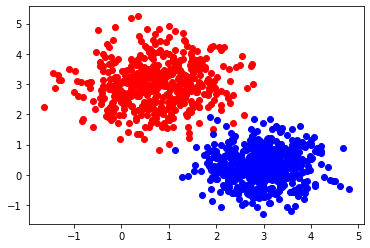

In [53]:
X,Y=createData()
labels=np.unique(Y)
#graficar datos usando un color diferente para cada grupo
color='rb'
for ii in labels:
        key = 'o'+color[ii]  
        lin,=plt.plot(X[Y==ii,0],X[Y==ii,1],key)
        

In [57]:
clf = LogisticRegression(solver='lbfgs')

#train the classfier
clf.fit(X,Y)


LogisticRegression()

In [59]:
#evaluate  the classifier
x=np.array([[2,5]])
p = clf.predict_proba(x)
c=clf.predict(x) 
print(p)
print(c)

[[9.99991650e-01 8.34964176e-06]]
[0]


In [60]:
p = clf.predict_proba(X)
c=clf.predict(X) 
print(p)
print(c)

[[9.98000583e-01 1.99941746e-03]
 [9.99997742e-01 2.25751504e-06]
 [9.98203312e-01 1.79668828e-03]
 ...
 [6.69244244e-04 9.99330756e-01]
 [2.11753805e-02 9.78824620e-01]
 [9.27694902e-04 9.99072305e-01]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

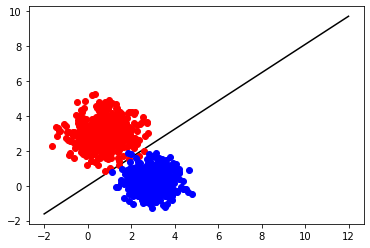

In [58]:
theta0=clf.intercept_ 
theta =clf.coef_
xx = np.linspace(-2, 12, 100)
yy=(-theta[0][0]*xx-theta0)/theta[0][1]
plt.plot(xx,yy,'k',linewidth=1.5)

#graficar datos usando un color diferente para cada grupo
color='rb'
for ii in labels:
        key = 'o'+color[ii]  
        lin,=plt.plot(X[Y==ii,0],X[Y==ii,1],key)

In [15]:
x=np.array([[4,1],[1,4],[0.3,5],[3,0.1]])
y=clf.predict(x)
y

array([1, 0, 0, 1])

In [16]:
y_pred=clf.predict(X)
prec = ((Y==y_pred).sum()/Y.size)*100
prec


99.7

In [81]:
### cargar datos
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

file_name='datosML/diabetes.data'
data=np.loadtxt(file_name,delimiter=',') 

X=data[:,:-1]
Y=data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=41)
print('Training set')
print(X_train.shape)
print(y_train.shape)

print('Test set')
print(X_test.shape)
print(y_test.shape)



Training set
(537, 8)
(537,)
Test set
(231, 8)
(231,)


In [79]:
clf = LogisticRegression(solver='lbfgs',max_iter=1000)

#train the classfier
clf.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [84]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[135,  18],
       [ 35,  43]], dtype=int64)

In [87]:
from sklearn.metrics import classification_report
#consultar la documentacion en la pagina oficial de sklearn
#para la matriz de confusion, classification report... 
target_names = ['Sano','Diabetes']
rep=classification_report(y_test, y_pred,target_names=target_names)
print(rep)


              precision    recall  f1-score   support

        Sano       0.79      0.88      0.84       153
    Diabetes       0.70      0.55      0.62        78

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

